In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r'D:\P16-Recurrent-Neural-Networks\Recurrent_Neural_Networks\Google_Stock_Price_Train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Preprocessing

In [5]:
training_set = df.iloc[:,1:2]
training_set.shape

(1258, 1)

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

# MODEL

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [21]:
regressor = Sequential()

In [25]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))

In [26]:
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(Dense(units=1))

In [29]:
regressor.compile(optimizer='Adam',loss='mse')

In [30]:
regressor.fit(X_train,y_train,epochs=100,verbose=True,batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 26s 22ms/sample - loss: 0.0425
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0040
Epoch 12/100
1198/1198 [====

# Test file 

In [31]:
df_test = pd.read_csv(r'D:\P16-Recurrent-Neural-Networks\Recurrent_Neural_Networks\Google_Stock_Price_Test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Date      20 non-null object
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [32]:
real_stock_price = df_test.iloc[:,1:2].values

In [33]:
dataset_total = pd.concat((df['Open'],df_test['Open']),axis=0)
inputs = dataset_total[len(df)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [34]:
X_test= []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

In [36]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [38]:
y_pred = regressor.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

In [39]:
y_pred

array([[751.9121 ],
       [745.4021 ],
       [743.41345],
       [746.32153],
       [748.8669 ],
       [753.2448 ],
       [758.6132 ],
       [763.3772 ],
       [768.4044 ],
       [772.41504],
       [774.4053 ],
       [776.01697],
       [774.0842 ],
       [774.15216],
       [775.0802 ],
       [775.22144],
       [774.8335 ],
       [774.52936],
       [775.3958 ],
       [773.2605 ]], dtype=float32)

In [40]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

 # comparison

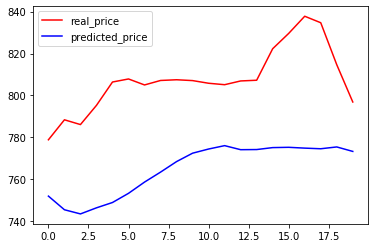

In [49]:
plt.plot(real_stock_price,color='red',label = 'real_price')
plt.plot(y_pred,color='blue',label = 'predicted_price')
plt.legend()
plt.show()